# <center> MCIT AWS Machine Learning Developer Program</center>
# Use case 1- Tabular Dataset :Default of Credit Card Clients 
# Made by: Omar Khater

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Read">Read and view the data </a></li>  
    - <a href="#Meta">Meta Data </a><br>
<li><a href="#Explore">Data Exploration and Visualization</a></li>
    - <a href="#Missing">Data types, missing and duplicate values </a><br>
    - <a href="#Feature_Exploration">Featureset Exploration </a><br>
    - <a href="#Outlier">Visualizing Numerical Outliers </a><br>
    - <a href="#Corr">Correlation Matrix </a><br>
    - <a href="#Customer_History">Visualizing customer history </a><br>
  
<li><a href="#Pre_processing">Data pre processing </a></li>
    - <a href="#splitting">Feature-label splitting </a><br>
    - <a href="#Age_binning">Age binning </a><br>
    - <a href="#Skewed">Transforming Skewed Continuous Features </a><br>
    - <a href="#norm">Normalizing Numerical Features </a><br>
    - <a href="#ohe">One-hot Encoding </a><br>
    - <a href="#sh">Shuffle and Split Data </a><br>
    
<li><a href="#Evaluate">Evaluating Model Performance</a></li>
    - <a href="#Metrics">Metrics and the Naive Predictor </a><br>
    - <a href="#NaivePer">Naive Predictor Performace </a><br>
    - <a href="#Supervised">Supervised Learning Models </a><br>
    - <a href="#App">Model Application </a><br>
    - <a href="#pipe">Creating a Training and Predicting Pipeline </a><br>
    - <a href="#init_eval">Initial Model Evaluation </a><br>
    
    
<li><a href="#Improve">Improving the results</a></li>
    - <a href="#Best"> Choosing the best model </a><br>
    - <a href="#Describe"> Describing the Model in Layman's Terms</a><br>
    - <a href="#Tuning"> Model Tuning</a><br>
    - <a href="#Final_Eval"> Final Model Evaluation</a><br>

<li><a href="#Feature_eng">Feature Engineering</a></li>
    - <a href="#undersampling"> Random undersampling </a><br>

    
<li><a href="#Feature_sel">Feature Selection</a></li>
    - <a href="#f_obs"> Feature Relevance Observation </a><br>
    - <a href="#f_ext"> Extracting Feature Importance</a><br>
    - <a href="#f_sel"> Feature Selection</a><br>
    - <a href="#f_eff"> Effects of Feature Selection</a><br>

<li><a href="#Conc">Conclusion and future work</a></li>
</ul>

<a id = "intro"></a>
## Introduction

In this project, **_several Machine Learning supervised algorithms is implemented_** to accurately predict customer default for a credit card issuer. Having _compared those elementary approaches to a naive predictor_, the best candidate algorithm is chosen from preliminary results. Finally,**_further optimization to this algorithm is done_**. _**<u>Our goal</u>**_ with this implementation is to **construct a model that accurately predicts whether an individual is going to delay the required payment in the next month or not**. This sort of task can arise in a credit card issuer settings where the accurate predictions of customer habits might be crucial for their financial situation.  

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) which uploaded by I-Cheng Yeh.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
# Import supplementary visualization code visuals.py
import visuals as vs
# Pretty display for notebooks
%matplotlib inline
submit = False
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score
# Import train_test_split
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
from dython.nominal import associations
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

<a id = "Read"></a>
----
## Read and view the Data

In [2]:
# Load the Census dataset
data = pd.read_excel('default of credit card clients.xls', index_col = 0)
# Success - Display the first record
display(data.head(n=1))

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


<a id = "Meta"></a>
### Meta data:
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

<a id = "Explore"></a>
----
## Data Exploration and Visualization
Before the data can be used as an input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. 

<a id ='Missing'></a>
### Data types, missing and duplicate values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30001 non-null  object
 1   X2      30001 non-null  object
 2   X3      29670 non-null  object
 3   X4      29678 non-null  object
 4   X5      30001 non-null  object
 5   X6      30001 non-null  object
 6   X7      30001 non-null  object
 7   X8      30001 non-null  object
 8   X9      30001 non-null  object
 9   X10     30001 non-null  object
 10  X11     30001 non-null  object
 11  X12     30001 non-null  object
 12  X13     30001 non-null  object
 13  X14     30001 non-null  object
 14  X15     30001 non-null  object
 15  X16     30001 non-null  object
 16  X17     30001 non-null  object
 17  X18     30001 non-null  object
 18  X19     30001 non-null  object
 19  X20     30001 non-null  object
 20  X21     30001 non-null  object
 21  X22     30001 non-null  object
 22  X23     30001 non-null  ob

In [4]:
data.isna().sum()

X1       0
X2       0
X3     331
X4     323
X5       0
X6       0
X7       0
X8       0
X9       0
X10      0
X11      0
X12      0
X13      0
X14      0
X15      0
X16      0
X17      0
X18      0
X19      0
X20      0
X21      0
X22      0
X23      0
Y        0
dtype: int64

In [5]:
data.nunique()

X1        82
X2         3
X3         6
X4         4
X5        64
X6        12
X7        12
X8        12
X9        12
X10       11
X11       11
X12    22724
X13    22347
X14    22027
X15    21549
X16    21011
X17    20605
X18     7944
X19     7900
X20     7519
X21     6938
X22     6898
X23     6940
Y          3
dtype: int64

Although the dataset defines all the features as `object`, it can be noticed ,from the number of unique values as well the provided meta data , that there are some categorical and numerical features. Thus, the data is reformatted 

In [6]:
# Extract Categorical data

Categorical_data = data[['X' + str(i) for i in range(2,5)] + ['X' + str(i) for i in range(6,12)] + ['Y']]
Categorical_data.columns = Categorical_data.loc['ID']
Categorical_data.drop(index = 'ID', inplace = True)

# Extract Numerical data 

numerical_data = data[['X1','X5']+ ['X' + str(i) for i in range(12,24)]]
numerical_data.columns = numerical_data.loc['ID']
numerical_data.drop(index = 'ID', inplace = True)
numerical_data = numerical_data.astype(float)

# Recombine the data 
data = pd.concat([numerical_data,Categorical_data],axis = 1)

# Rename the columns. Please note the index months has reversed 
# 1 : 6 >> Septemper : April (old)
# 1 : 6 >> April : Septemper (new)
data.rename(columns={"default payment next month": "Y", 
                    "BILL_AMT1":"BILL_AMT6", "BILL_AMT2":"BILL_AMT5", "BILL_AMT3":"BILL_AMT4", 
                    "BILL_AMT4":"BILL_AMT3", "BILL_AMT5":"BILL_AMT2", "BILL_AMT6":"BILL_AMT1",
                    "PAY_AMT1":"PAY_AMT6", "PAY_AMT2":"PAY_AMT5", "PAY_AMT3":"PAY_AMT4", 
                    "PAY_AMT4":"PAY_AMT3", "PAY_AMT5":"PAY_AMT2", "PAY_AMT6":"PAY_AMT1",
                    "PAY_0":"PAY_6", "PAY_2":"PAY_5", "PAY_3":"PAY_4", 
                    "PAY_4":"PAY_3", "PAY_5":"PAY_2", "PAY_6":"PAY_1"},
            inplace = True)
data = data.reindex(sorted(data.columns), axis=1)
# View the data 
display(data.head(n=2))

ID,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,LIMIT_BAL,MARRIAGE,...,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,Y
1,24.0,0.0,0.0,0.0,689.0,3102.0,3913.0,university,20000.0,married,...,2,2,0.0,0.0,0.0,0.0,689.0,0.0,female,1
2,26.0,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,university,120000.0,single,...,2,-1,2000.0,0.0,1000.0,1000.0,1000.0,0.0,female,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        30000 non-null  float64
 1   BILL_AMT1  30000 non-null  float64
 2   BILL_AMT2  30000 non-null  float64
 3   BILL_AMT3  30000 non-null  float64
 4   BILL_AMT4  30000 non-null  float64
 5   BILL_AMT5  30000 non-null  float64
 6   BILL_AMT6  30000 non-null  float64
 7   EDUCATION  29669 non-null  object 
 8   LIMIT_BAL  30000 non-null  float64
 9   MARRIAGE   29677 non-null  object 
 10  PAY_1      30000 non-null  object 
 11  PAY_2      30000 non-null  object 
 12  PAY_3      30000 non-null  object 
 13  PAY_4      30000 non-null  object 
 14  PAY_5      30000 non-null  object 
 15  PAY_6      30000 non-null  object 
 16  PAY_AMT1   30000 non-null  float64
 17  PAY_AMT2   30000 non-null  float64
 18  PAY_AMT3   30000 non-null  float64
 19  PAY_AMT4   30000 non-null  float64
 20  PAY_AMT5   

In [8]:
data.Y.sum() / len(data.Y)

0.2212

In [9]:
data.dropna(inplace = True, axis = 0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29351 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        29351 non-null  float64
 1   BILL_AMT1  29351 non-null  float64
 2   BILL_AMT2  29351 non-null  float64
 3   BILL_AMT3  29351 non-null  float64
 4   BILL_AMT4  29351 non-null  float64
 5   BILL_AMT5  29351 non-null  float64
 6   BILL_AMT6  29351 non-null  float64
 7   EDUCATION  29351 non-null  object 
 8   LIMIT_BAL  29351 non-null  float64
 9   MARRIAGE   29351 non-null  object 
 10  PAY_1      29351 non-null  object 
 11  PAY_2      29351 non-null  object 
 12  PAY_3      29351 non-null  object 
 13  PAY_4      29351 non-null  object 
 14  PAY_5      29351 non-null  object 
 15  PAY_6      29351 non-null  object 
 16  PAY_AMT1   29351 non-null  float64
 17  PAY_AMT2   29351 non-null  float64
 18  PAY_AMT3   29351 non-null  float64
 19  PAY_AMT4   29351 non-null  float64
 20  PAY_AMT5   

In [11]:
data.Y.sum() / len(data.Y)

0.22234336138462063

In [12]:
data.index.duplicated().sum()

0

Small fraction of the rows are missing their values for `Education` and `marriage` columns ( 331 out of 30,000 or 1.10%). Thus, there is no need for `imputation` since dropping the missing rows will not harm the data fed to the model too much or even affect the target column balance. Furthermore, the data represents unique set of customers as indicated by the index column `ID`. Finally, the final data for this stage is presented below

In [13]:
display(data.head(n=2))

ID,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,LIMIT_BAL,MARRIAGE,...,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,Y
1,24.0,0.0,0.0,0.0,689.0,3102.0,3913.0,university,20000.0,married,...,2,2,0.0,0.0,0.0,0.0,689.0,0.0,female,1
2,26.0,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,university,120000.0,single,...,2,-1,2000.0,0.0,1000.0,1000.0,1000.0,0.0,female,1


<a id = 'Feature_Exploration'></a>
### Featureset Exploration

An important step before applying Machine Learning is to understand the data in depth in order to make justified decisions regarding the feature set. 

In [14]:
# Frequency tables for each categorical feature
for column in data.select_dtypes(include=['object']).columns:
    a = pd.DataFrame(100*(data.groupby([column])[column].count()/data.shape[0]))
    a.columns = ['% observations']
    display(a)

,% observations
EDUCATION,
0,0.047699
graduate school,35.893155
high school,16.398078
others,0.412252
university,47.248816


,% observations
MARRIAGE,
0,0.183980
married,45.930292
single,53.885728


,% observations
PAY_1,
-2,16.340159
-1,19.215700
0,54.079929
2,9.308030
3,0.626895
4,0.163538
5,0.044292
6,0.061327
7,0.153317


,% observations
PAY_2,
-2,15.219243
-1,18.561548
0,56.205921
2,8.858301
3,0.603046
4,0.286191
5,0.057920
6,0.013628
7,0.190794


,% observations
PAY_3,
-2,14.565091
-1,19.052162
0,54.584171
1,0.006814
2,10.623147
3,0.599639
4,0.235086
5,0.119246
6,0.017035


,% observations
PAY_4,
-2,13.686075
-1,19.869851
0,52.284420
1,0.013628
2,12.841130
3,0.800654
4,0.255528
5,0.071548
6,0.078362


,% observations
PAY_5,
-2,12.626486
-1,20.319580
0,52.151545
1,0.091990
2,13.181834
3,1.103881
4,0.327076
5,0.085176
6,0.040884


,% observations
PAY_6,
-2,9.212633
-1,19.113488
0,48.863753
1,12.353923
2,8.912814
3,1.066403
4,0.258935
5,0.085176
6,0.037477


,% observations
SEX,
female,60.348881
male,39.651119


,% observations
Y,
0,77.765664
1,22.234336


ID,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29351.000000,29351.000000,29351.000000,29351.000000,2.935100e+04,29351.000000,29351.000000,29351.000000,29351.000000,29351.000000,29351.000000,29351.000000,2.935100e+04,29351.000000
mean,35.424244,38915.298559,40308.864672,43196.697728,4.685549e+04,48987.296515,50981.534939,168270.031004,5193.879868,4796.015298,4821.544343,5187.081905,5.870514e+03,5639.660966
std,9.495480,59605.713552,60809.903678,64315.255250,6.923258e+04,71029.261051,73457.706806,129978.839521,17663.562225,15159.798191,15350.441039,16846.579800,2.205772e+04,15842.478777
min,21.000000,-339603.000000,-81334.000000,-170000.000000,-1.572640e+05,-69777.000000,-165580.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,28.000000,1263.000000,1760.500000,2303.000000,2.606000e+03,2938.000000,3483.000000,50000.000000,130.000000,259.000000,291.000000,390.000000,8.145000e+02,991.000000
50%,34.000000,17080.000000,18078.000000,19005.000000,2.002700e+04,21041.000000,22206.000000,140000.000000,1500.000000,1501.000000,1500.000000,1800.000000,2.009000e+03,2100.000000
75%,41.000000,49276.500000,50225.000000,54425.500000,5.987650e+04,63640.000000,66685.000000,240000.000000,4001.000000,4077.500000,4027.000000,4505.000000,5.000000e+03,5007.000000
max,267.000000,961664.000000,927171.000000,891586.000000,1.664089e+06,983931.000000,964511.000000,1000000.000000,528666.000000,426529.000000,528897.000000,896040.000000,1.684259e+06,505000.000000


ID,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX,Y
count,29351,29351,29351,29351,29351,29351,29351,29351,29351,29351
unique,5,3,10,10,11,11,11,11,2,2
top,university,single,0,0,0,0,0,0,female,0
freq,13868,15816,15873,16497,16021,15346,15307,14342,17713,22825


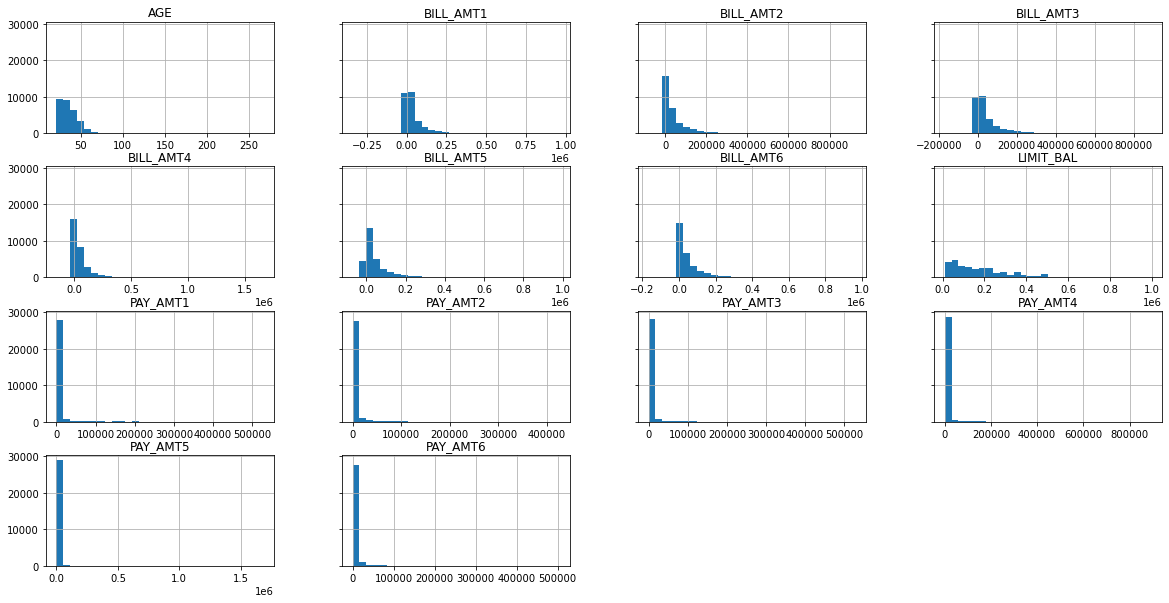

In [15]:
## Explore numerical features
display(data.describe())
# Explore categorical features
display(data.describe(include=np.object))
#%matplotlib inline
hist = data.hist(bins=30, sharey=True, figsize=(20, 10))

**Key observations**:
   - Imbalanced target label with majority of the customers (~77%) are not expected to default their payment. 
   - Most numerical columns exhibits outliers indicated by their skewed distribution.
   - All six `Bill amount` columns have **negative values** which means the bill was _overpaid_ and this customer may be eligible for a refund.
   - Some categorical feature have unclear values such as `EDUCATION` which has some values other than the expected 4 values ( the 0 category). In addition, `MARRIAGE` column uses the string of 0 to indicate "other" category. _Nevertheless_, for this report we keep them as a seperate category. 

<a id = 'Outlier'></a>
### Visualizing nuemrical outliers

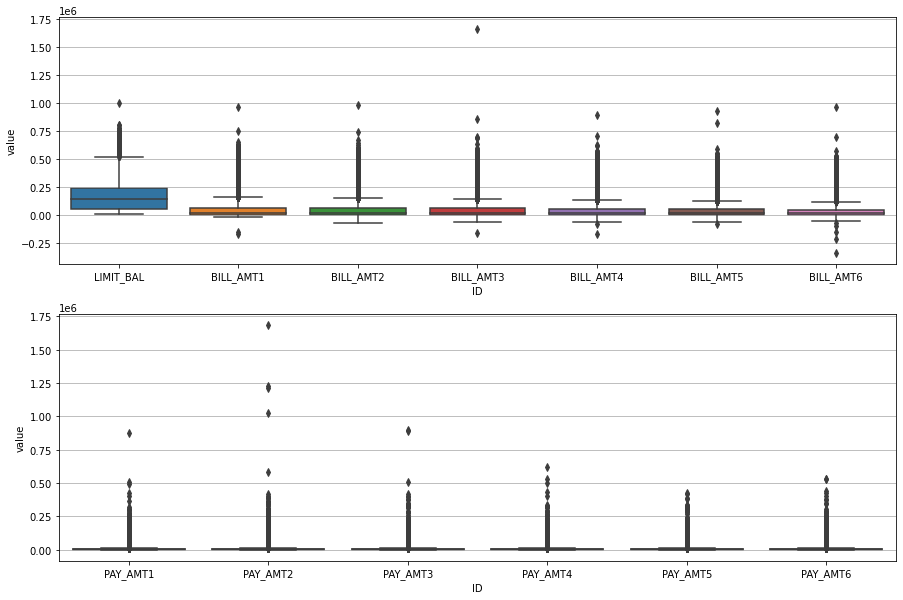

In [16]:
fig1,ax1 = plt.subplots(2,1,figsize = (15,10))
ax1[0].grid()
sns.boxplot(ax = ax1[0] ,x="ID", y="value", data=pd.melt(numerical_data[['LIMIT_BAL']+['BILL_AMT' + str(i) for i in range(1,7)]]));
ax1[1].grid()
sns.boxplot(ax = ax1[1] ,x="ID", y="value", data=pd.melt(numerical_data[['PAY_AMT' + str(i) for i in range(1,7)]]));

<a id = 'Corr'></a>
### Correlation matrix

It is quite uesful to look up different relationships in the given data to gain some insights before digging in the details of the preprocessing. One way to do so is to explore the corrleation between different features. However, It is a little tricky to do so using conventional libiraries with catergorical features despite its importance. One useful package for this purpose can be found [here](https://github.com/shakedzy/dython) where all the documentation and installation instructions can be found. Here, we need to find association between different features including categorical features.

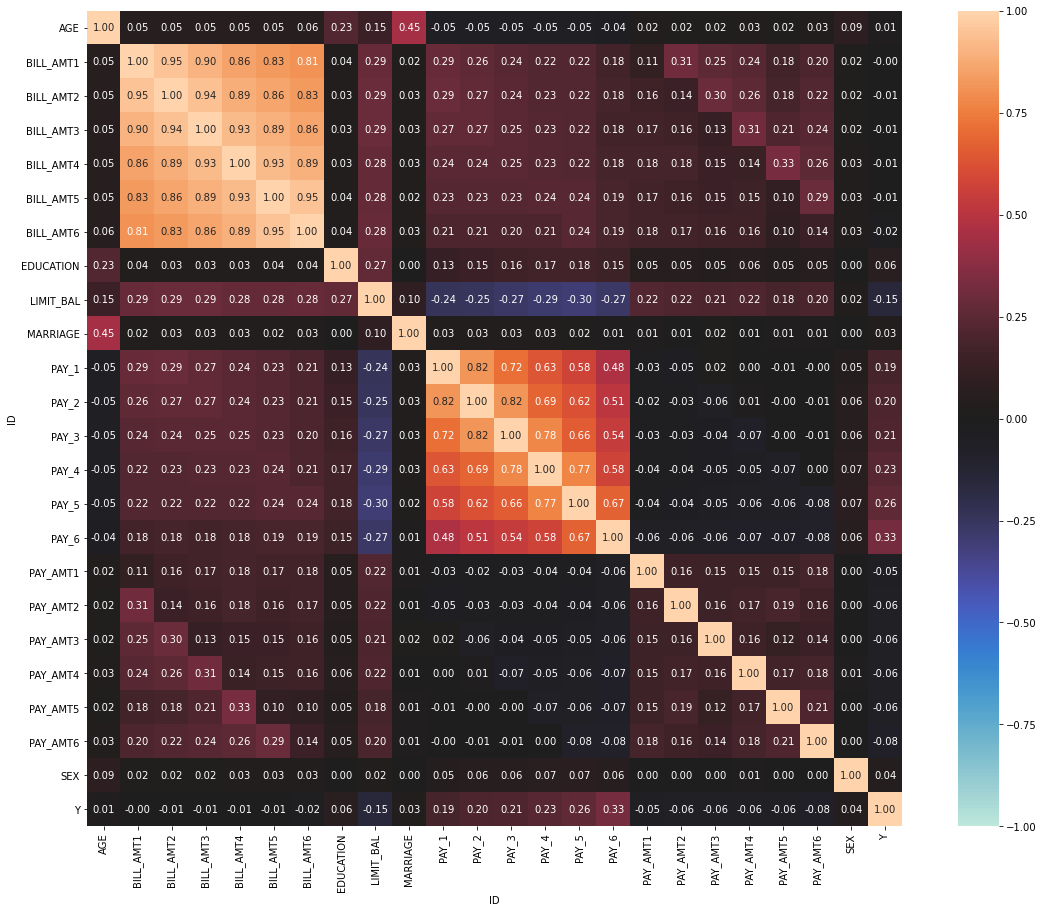

In [17]:
M = associations(data,figsize = (20,15))

**Key observations**:

- `Bill amount` feature for any month exhibits _strong_ **positive** correlation with adjacent columns [i.e., month2 is highly positive correlated to both month1 and 3] while this value decreases with non-adjacent months. This suggests only keeping either month2 or month 1 and 3 in the given example while doing feature engineering. _Another approach_ is to use month 1 and 4 only among the whole 6 features to exclude above 90% correlated features.
- Similar situation happens with delayed payment features (i.e., `PAY_1:PAY_6`) indicating that there is a lot of chance that the person who delayed the payment once to continue off-track in later months. _On other side_, clients with regular payment habits tend to keep this routine. Furthermore, the correlation decreases with later months as noted above.
- On the other side, there is a strong negative correlation between `LIMIT_BILL` and delayed payment features (i.e., `PAY_1:PAY_6`). For instance, `LIMIT_BILL` and `PAY_1` have a value of `-.24` suggesting that as the limit **increases**, the value of payment delay is actually **decreasing** meaning less delyed months.
- The target label has a strong positive correlation with delayed payment features (i.e., `PAY_1:PAY_6`) suggesting that the Machine Learning model is going to give them higher weights than other features. Furthermore, the latest payment status (i.e., `PAY_6` is expected to have the largest weight. These assumptions will be re-visited later in Machine Learning modeling stage. 

<a id = 'Customer_History'></a>
### Visualizing customer history

Before actually applying machine learning, it is quiet interseting to try to make some rough prediction based on insights gained from aforomentioned analysis. For example, one can tend to make prediction regarding `customer default` based on the pattern noticed from both `billed amount` and `payed amount` for both `target labels`. The figure below exemplifies this approach for 20 random clients. 

Index: 4939, Default? 1


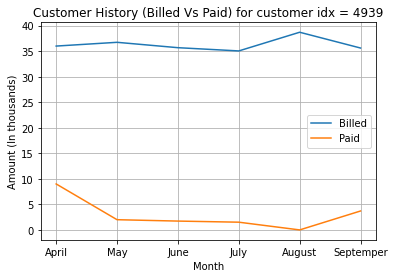

Index: 1382, Default? 1


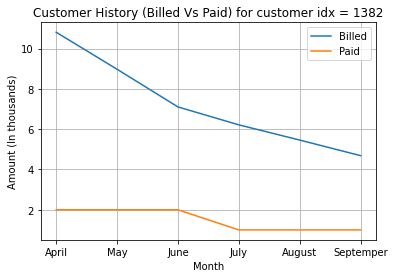

Index: 4372, Default? 1


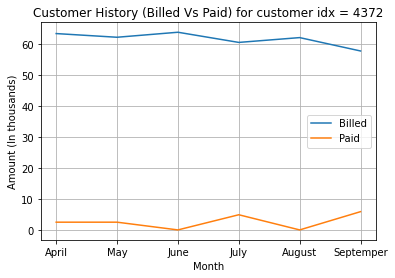

Index: 64, Default? 1


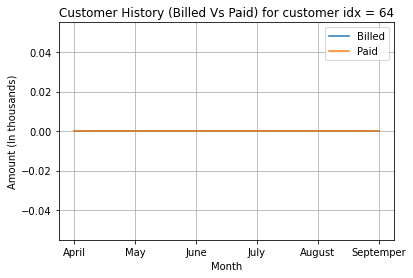

Index: 2808, Default? 1


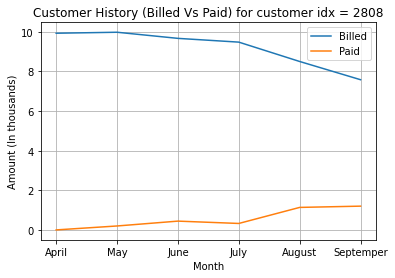

Index: 4810, Default? 1


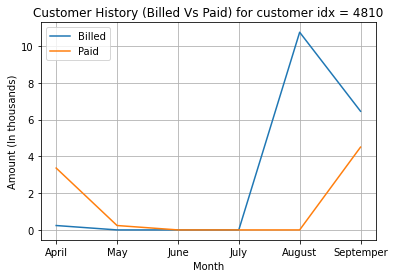

Index: 1337, Default? 1


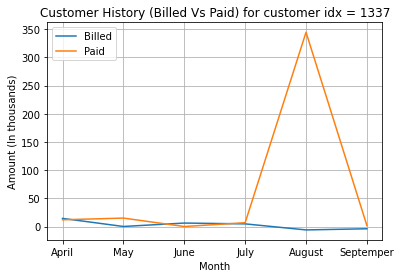

Index: 2680, Default? 1


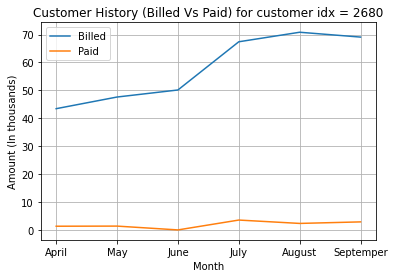

Index: 6491, Default? 1


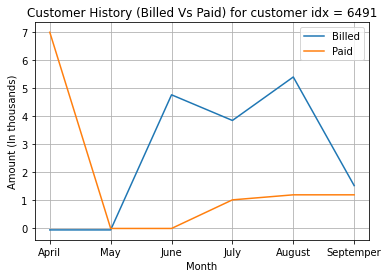

Index: 5009, Default? 1


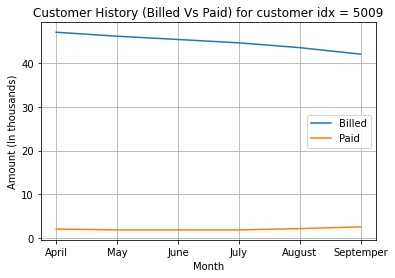

In [18]:
for i in range(10):
    idx = np.random.randint(low = 0, high = data.query('Y == 1').shape[0])
    vs.customer_hist(data.query('Y == 1'), idx)

Index: 21595, Default? 0


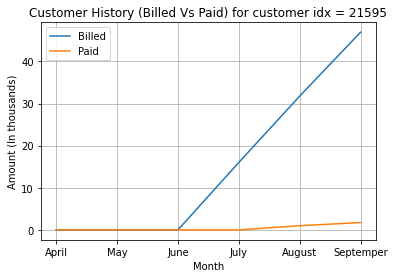

Index: 6631, Default? 0


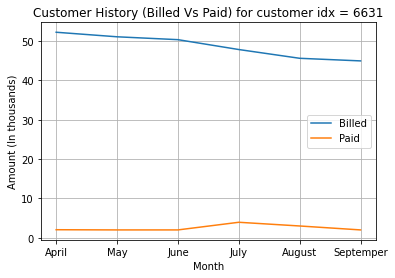

Index: 12440, Default? 0


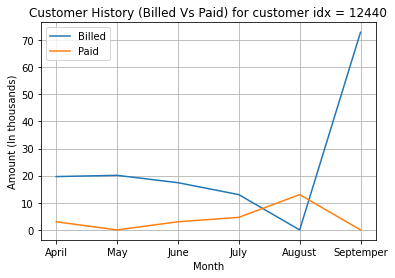

Index: 13344, Default? 0


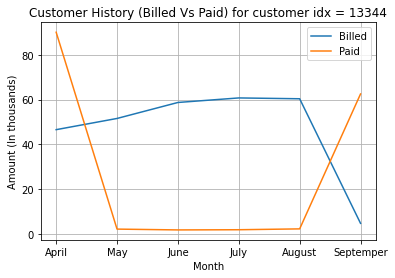

Index: 5565, Default? 0


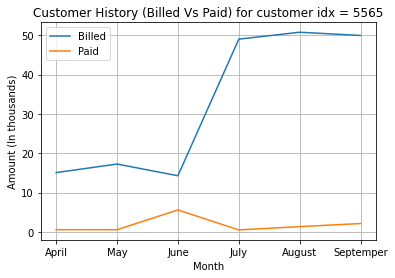

Index: 12923, Default? 0


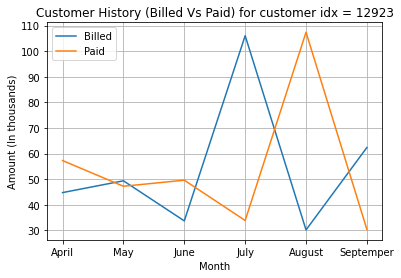

Index: 2273, Default? 0


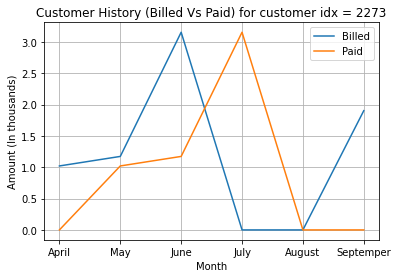

Index: 3500, Default? 0


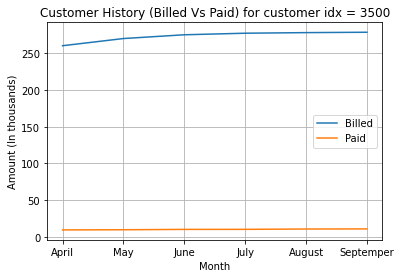

Index: 12120, Default? 0


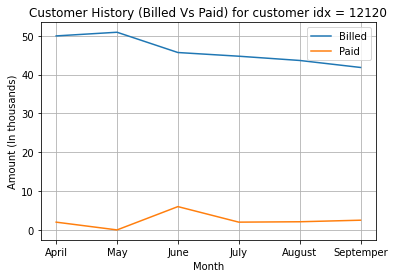

Index: 3511, Default? 0


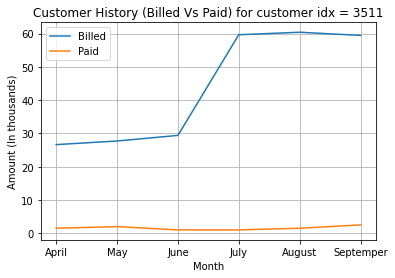

In [19]:
for i in range(10):
    idx = np.random.randint(low = 0, high = data.query('Y == 0').shape[0])
    vs.customer_hist(data.query('Y == 0'), idx)

It turns out that as the gap between the billed amount and paid amount _increases_ then the probability of customer default is _increasing_ despite it is not a general rule. However, this insight cannot be directly noted from the correlation matrix above. 

<a id = 'Pre_processing'></a>
## Data pre-processing

<a id = 'splitting'></a>
### Feature-label splitting 

In [20]:
# Split the data into features and target label
default = data['Y']
features_raw = data.drop('Y', axis = 1)

<a id = 'Age_binning'></a>
### Age Binning

The age is typically a number. However, it is not something useful to feed the ML model with a numeric age feature for many reasons:

- First, there is no direct relation between the age as a number and the probability of customer default.
- More importantly, numeric age addes _bias_ to the model since it assumes that the person who is 50 years old is as twice likely to generate some behaviour as 25 years old person. 
- In addition, some values are actually outliers which we don't afford the drop the whole row only because it has an oultier age. 

_**Luckily**_, the **binning** trick comes to the rescue by converting the age into a categorical feature to be one hot encoded later with other categorical features. It works on dividing the age column into specific number of bins (hence the name) or categories and then assign each customer to the appropriate category. 

In [21]:
cut_labels = ['20s', '30s', '40s', '50s','60s','outliers']
cut_bins = [20, 30, 40, 50, 60,70,80]
features_raw['AGE'] = pd.cut(data['AGE'], bins=cut_bins, labels=cut_labels)
features_raw

ID,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,LIMIT_BAL,MARRIAGE,...,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX
1,20s,0.0,0.0,0.0,689.0,3102.0,3913.0,university,20000.0,married,...,-1,2,2,0.0,0.0,0.0,0.0,689.0,0.0,female
2,20s,3261.0,3455.0,3272.0,2682.0,1725.0,2682.0,university,120000.0,single,...,0,2,-1,2000.0,0.0,1000.0,1000.0,1000.0,0.0,female
3,30s,15549.0,14948.0,14331.0,13559.0,14027.0,29239.0,university,90000.0,single,...,0,0,0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,female
4,30s,29547.0,28959.0,28314.0,49291.0,48233.0,46990.0,university,50000.0,married,...,0,0,0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,female
5,50s,19131.0,19146.0,20940.0,35835.0,5670.0,8617.0,university,50000.0,married,...,-1,0,-1,679.0,689.0,9000.0,10000.0,36681.0,2000.0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,30s,15980.0,31237.0,88004.0,208365.0,192815.0,188948.0,high school,220000.0,married,...,0,0,0,1000.0,5000.0,3047.0,5003.0,20000.0,8500.0,male
29997,40s,0.0,5190.0,8979.0,3502.0,1828.0,1683.0,high school,150000.0,single,...,-1,-1,-1,0.0,0.0,129.0,8998.0,3526.0,1837.0,male
29998,30s,19357.0,20582.0,20878.0,2758.0,3356.0,3565.0,university,30000.0,single,...,2,3,4,3100.0,2000.0,4200.0,22000.0,0.0,0.0,male
29999,40s,48944.0,11855.0,52774.0,76304.0,78379.0,-1645.0,high school,80000.0,married,...,0,-1,1,1804.0,52964.0,1926.0,1178.0,3409.0,85900.0,male


<a id ="Skewed"></a>
### Transforming Skewed Continuous Features

A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With this dataset, a lot of features fit this description. For example, all `Pay_AMT1:6`, `BILL_AMT1:6`, `LIMIT_BAL`  exhibit outliers phenomena. 

For highly-skewed feature distributions, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. **Using a logarithmic transformation** significantly reduces the range of values caused by outliers. _However_, care must be taken when applying this transformation since the logarithm of `0` is undefined. So, these values must by translated by a small amount above `0` to apply the logarithm successfully. 

As noted in <a href="#Feature_Exploration">Featureset Exploration </a>, the `BILL_AMT1:6` have considerable amount of negative values so applying this transofrmation on them will yield `Nan` values. So, only `LIMIT_BAL` and `Pay_AMT1:6` is transformed at this stage. _Nevertheless_, `BILL_AMT1:6` negative values contain some information that one does not want to lose so, other scaling options is considered later. 

F:\ML\AWS\Phase2\Use_Cases\Tabular\Default-of-Credit-Card-Clients\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


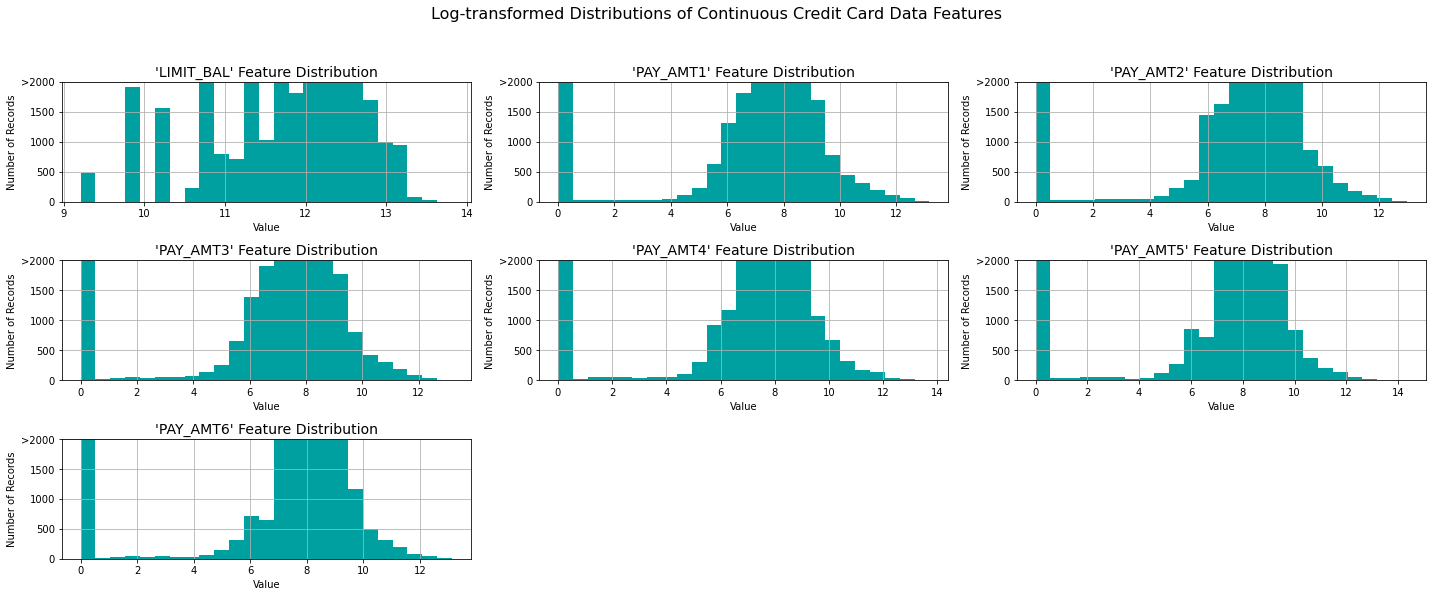

In [22]:
# Log-transform the skewed features (without negative values)
skewed = ['LIMIT_BAL'] + ['PAY_AMT'+ str(i) for i in range(1,7)]
features_log_transformed = features_raw.copy()
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
# Visualize the new log distributions
vs.distribution(features_log_transformed, features = skewed, transformed = True)

So, comparing this log-transformed distributions to previous ones reveals that the ML algorithm can now get a lot of useful insight.

<a id = "norm"></a>
### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `Log transformation` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning.

[`sklearn.preprocessing.MinMaxScaler`](http://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) is used to normalize each numerical feature.

In [23]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ["LIMIT_BAL"] + ['BILL_AMT' + str(i) for i in  range(1,7)] + ['PAY_AMT'+str(i) for i in  range(1,7)]

features_log_minmax_transform = pd.DataFrame(data = features_raw)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

ID,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,LIMIT_BAL,MARRIAGE,...,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX
1,20s,0.260979,0.080648,0.160138,0.086723,0.069164,0.149982,university,0.010101,married,...,-1,2,2,0.000000,0.000000,0.000000,0.000000,0.000409,0.000000,female
2,20s,0.263485,0.084074,0.163220,0.087817,0.067858,0.148892,university,0.111111,single,...,0,2,-1,0.003783,0.000000,0.001891,0.001116,0.000594,0.000000,female
3,30s,0.272928,0.095470,0.173637,0.093789,0.079532,0.172392,university,0.080808,single,...,0,0,0,0.009458,0.002345,0.001891,0.001116,0.000891,0.003006,female
4,30s,0.283685,0.109363,0.186809,0.113407,0.111995,0.188100,university,0.040404,married,...,0,0,0,0.001892,0.002506,0.002080,0.001339,0.001199,0.003960,female
5,50s,0.275681,0.099633,0.179863,0.106020,0.071601,0.154144,university,0.040404,married,...,-1,0,-1,0.001284,0.001615,0.017017,0.011160,0.021779,0.003960,male


<a id = "ohe"></a>
### One-hot Encoding

From the table in <a href="#Feature_Exploration">Featureset Exploration </a> above, It can be noted that there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

In [24]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

35 total features after one-hot encoding.
['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE_20s', 'AGE_30s', 'AGE_40s', 'AGE_50s', 'AGE_60s', 'AGE_outliers', 'EDUCATION_0', 'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_others', 'EDUCATION_university', 'MARRIAGE_0', 'MARRIAGE_married', 'MARRIAGE_single', 'SEX_female', 'SEX_male']


## Pre-processing pipeline

In [ ]:
def pre_process(data):
    
    return data_processed

<a id = "sh"></a>
### Shuffle and Split Data

Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, data should be splitted (both features and their labels) into training and test sets.

In [25]:
features_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29351 entries, 1 to 30000
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BILL_AMT1                  29351 non-null  float64
 1   BILL_AMT2                  29351 non-null  float64
 2   BILL_AMT3                  29351 non-null  float64
 3   BILL_AMT4                  29351 non-null  float64
 4   BILL_AMT5                  29351 non-null  float64
 5   BILL_AMT6                  29351 non-null  float64
 6   LIMIT_BAL                  29351 non-null  float64
 7   PAY_1                      29351 non-null  int64  
 8   PAY_2                      29351 non-null  int64  
 9   PAY_3                      29351 non-null  int64  
 10  PAY_4                      29351 non-null  int64  
 11  PAY_5                      29351 non-null  int64  
 12  PAY_6                      29351 non-null  int64  
 13  PAY_AMT1                   29351 non-null  float64


In [26]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    default, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 23480 samples.
Testing set has 5871 samples.


<a id ="Evaluate"></a>
----
## Evaluating Model Performance

In this section, four different algorithms will be investigated to determine which is best at modeling the data. Three of these algorithms will be _**supervised learners**_, and the fourth algorithm is known as a _**naive predictor**_.

<a id = "Metrics"></a>
### Metrics and the Naive Predictor

It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* default as someone who does would be detrimental to this credit card issuer, since they are looking to find the person who default for further actions. Therefore, a model's ability to **precisely** predict those that default is *more important* than the model's ability to **recall** those individuals who does not. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes, it's clear that most individuals do not default. This can greatly affect **accuracy**, since one could simply say "this person does not default`" and generally will be right, without ever looking at the data! Making such a statement would be called **naive**, since no consideration has been taken for any information to substantiate the claim. It is always important to consider the *naive prediction* for the data, to help establish a benchmark for whether a model is performing well.

#### Note: Recap of accuracy, precision, recall

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of true positives, actually were true positives.
It is a ratio of true positives(indviduals classified as default , and which are actually make) to all positives(all default people), it can be expressed as 

<center> $Precision=\ \frac{True\ positives}{True\ positives+False\ positives} $ </center>

**Recall(sensitivity)** tells what proportion of people that actually were default and were classified as default.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

<center> $Recall=\ \frac{True\ positives}{True\ positives + False\ negatives} $ </center>

For classification problems that are skewed in their classification distributions like this case, for example if there are 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. One could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is the weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

In [27]:
Beta_All = 1

<a id = "NaivePer"></a>
### Naive Predictor Performace

The model which always predict all customers as **default** will be explored. 

The purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally the base model would be either the results of a previous model or could be based on a research paper upon which one is looking to improve. When there is no benchmark model set, getting a result better than random choice is a good starting point.

In [28]:
# Calculate accuracy, precision and recall

TP = np.sum(default)
FP = len(default) - TP
TN = 0
FN = 0 

accuracy = (TP + TN)/(TP + FP + TN + FN)
recall = (TP) / (TP + FN)
precision = TP / (TP + FP)

# Calculate F-score using the formula above 

fscore = (1+ Beta_All**2) * (precision * recall) / (Beta_All **2 * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2223, F-score: 0.3638]


<a id = "Supervised"></a>
###  Supervised Learning Models

<a id = "App"></a>
### Model Application

Three of the supervised learning models that are appropriate for this problem would be disccussed as following:

- Real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given the gained knowledge so far?

|      Comparison        | SVM	                  | Random Forest          | Naive Bayes|
| :-:                    |        :-:             |                        | :-:        |
| Real World Application |  Image Classifiers	  |  Recommendation Systems| Spam Classifiers|
| Pros1                  |  Kernels          	  |  Not sensitive to outliers| Ability to handle an extremely large number of features|
| Pros2                  |  Maximize Boundaries  |   Handles both categorical and continuous data| Performs well even with the presence of irrelevant features|
| Pros3                  |  Many tunable parameters  |   Aggregate the wisdom of random weak learners| It rarely ever overfits the data|
| Cons 1                  |   Sensitive to outliers i.e. when target classes are overlapping  |   Prone to over fitting| Vanishing values due to multiplication of small probabilities|
| Candidacy for this data |   Ability to handle non-linear relationships  |   It can handle categorical features effectively| Fast but accurate classifier|

<a id = "pipe"></a>
### Creating a Training and Predicting Pipeline

To properly evaluate the performance of chosen models, it's important to create a training and predicting pipeline that allows quickly and effectively train models using various sizes of training data and perform predictions on the testing data. This implementation will be used in the following section.

The code block below implements the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.

In [29]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test, Beta = 1): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train.iloc[0:sample_size+1, :], y_train[0:sample_size+1])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train.iloc[0:300, :])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(predictions_train[0:300], y_train[0:300])
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(predictions_test, y_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(predictions_train[0:300], y_train[0:300], beta = Beta)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(predictions_test, y_test, beta = Beta)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

<a id = "init_eval"></a>
### Initial Model Evaluation

The next code cell implements the following:
- Import the three supervised learning models discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model if provided.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

GaussianNB trained on 234 samples.
GaussianNB trained on 2348 samples.
GaussianNB trained on 23480 samples.
SVC trained on 234 samples.
SVC trained on 2348 samples.
SVC trained on 23480 samples.
RandomForestClassifier trained on 234 samples.
RandomForestClassifier trained on 2348 samples.
RandomForestClassifier trained on 23480 samples.


F:\ML\AWS\Phase2\Use_Cases\Tabular\Default-of-Credit-Card-Clients\visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


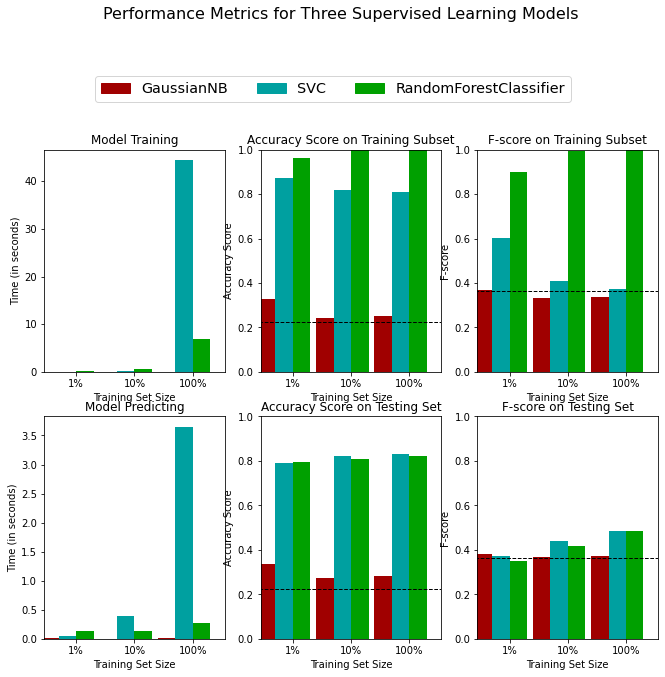

In [30]:
# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Initialize the three models
clf_A = GaussianNB()
clf_B = SVC(random_state = 42)
clf_C = RandomForestClassifier(random_state = 42)

# Calculate the number of samples for 1%, 10%, and 100% of the training data

samples_100 = len(y_train)
samples_10 = int(.1 * samples_100)
samples_1 = int(.01 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, s in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, s, X_train, y_train, X_test, y_test, Beta = Beta_All)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [31]:
AllDataResults = []
for m in results.keys():
    AllDataResults.append([results[m][2].get(key) for key in ['acc_test','f_test','pred_time']])

AllDataResults = pd.DataFrame(AllDataResults, index = results.keys(), columns = ['Accuracy test', 'F test', 'Prediction time (s)'])
AllDataResults

,Accuracy test,F test,Prediction time (s)
GaussianNB,0.283938,0.372162,0.015630
SVC,0.828820,0.486983,3.645860
RandomForestClassifier,0.822517,0.485686,0.273416


<a id = "Improve"></a>
----
## Improving Results

<a id = 'Best'></a>
### Choosing the Best Model

Based on the initial model evaluation results on the full data ,the `RandomForestClassifier` successfully prove its capability to produce more percise prediction in a little prediction time for large number of samples. Furthermore, the data has a lot of outliers which can be easily handled by tree-based models. Besides, the data has a lot of categorical features which can be another good reason to select tree models.  

<a id = 'Describe'></a>
### Describing the Model in Layman's Terms

`RandomForestClassifier` exploits the power of aggregating multiple weak classifiers in such a way to construct a strong classfier. By assigning a random small set of features to each learner, it can be able to learn the patterns hidden in those columns. Taking the teamwork of many trees thus improving the performance of a single random tree <sup>[Random forest](https://en.wikipedia.org/wiki/Random_forest).</sup> Basically, the weak learner is a decision tree which group similar data together based on a spicific condition. For example, the tree might want to divide the data points based on the education level feature and build further decisions upon completing this grouping. As a concrete example, if the data point has a bachelor degree then this point has more potential to have income greater than required threshold.   

<a id = 'Tuning'></a>
### Model Tuning
Finally, a grid search is preformed on the selected model to fine tune its parameters to improve the results as much as possible. 

**Note:** The following implementation may take several minutes to run!

In [32]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# Initialize the classifier
clf = RandomForestClassifier(random_state = 42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators' : [100, 200, 500] , 'max_depth' : [2,4,10], 'min_samples_split': [8,20], 
             'min_samples_leaf': [5,15]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta= Beta_All)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, scoring = scorer, param_grid = parameters,verbose = 1,n_jobs = 2)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed: 10.6min finished


In [33]:
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = Beta_All)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = Beta_All)))

Unoptimized model
------
Accuracy score on testing data: 0.8225
F-score on testing data: 0.4857

Optimized Model
------
Final accuracy score on the testing data: 0.8266
Final F-score on the testing data: 0.4785


<a id = 'Final_Eval'></a>
### Final Model Evaluation

After a long time of searching the overall performance of model has been increased a little bit. The optimized model over perform the unoptimized model in both accuracy and F-score. Furthermore, the fine-tuned model super outperforms the naive predictor used as a baseline model.

In [34]:
FinalResults = pd.DataFrame(data = [[accuracy *100, accuracy_score(y_test, predictions)*100, accuracy_score(y_test, best_predictions) * 100],
                               [fscore, fbeta_score(y_test, predictions, beta = Beta_All), fbeta_score(y_test, best_predictions, beta = Beta_All)]],
                      index = ['Accuracy Score (%)', 'F-score [0 - 1]'], columns = ['Baseline Model', 'Unoptimized Model', 'Optimized Model'])
FinalResults

,Baseline Model,Unoptimized Model,Optimized Model
Accuracy Score (%),22.234336,82.251746,82.660535
F-score [0 - 1],0.363799,0.485686,0.478484


The best parameters found are

In [35]:
best_clf

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=20,
                       n_estimators=500, random_state=42)

<a id= 'Confusion'></a>
### Confusion Matrix

Another powerful tool to visualize the model performance is to use the confusion matrix which is presented below

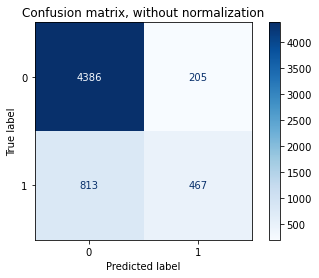

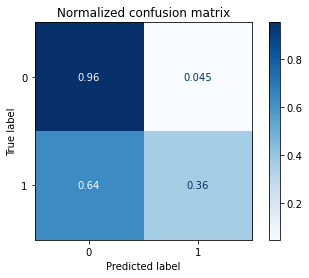

In [36]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(best_clf, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize);
    disp.ax_.set_title(title)

plt.show()

<a id = 'Feature_eng'></a>
## Feature Engineering

The results so far is not so promising as evident from the low true positive rate. One possible explanation for this situation is that the target label is highly impalanced toward negative predictions. 

There are two main ways to handle imbalanced datasets:

- Oversample to add more positive samples
    - Random oversampling
    - Synthetic minority oversampling technique (SMOTE)
    
- Undersample to reduce the negative samples

    - Random undersampling
    - Generate centroids using clustering methods
    
Undersampling is choosen in this iteration to help improve the model performance. This technique is reducing the number of negative samples so that the target label become more balanced.  

In [40]:
default_df = features_final[features_final['Y'] == 1]

non_default_df = features_final[features_final['Y'] == 0].sample(n=len(default_df), random_state=235)

balanced_features_final = pd.concat([default_df, non_default_df], ignore_index=True, sort=False)

balanced_features_final.head()

KeyError: 'Y'

<a id= "Feature_sel"></a>
----
## Feature Selection

An important task when performing supervised learning is determining which features provide the most predictive power. By focusing on the relationship between only few crucial features and the target label, understanding of the phenomenon can be significantly smplified. This could be useful to identify a small number of features that most strongly predict whether an individual default or not.

<a id = 'f_ext'></a>
### Extracting Feature Importance

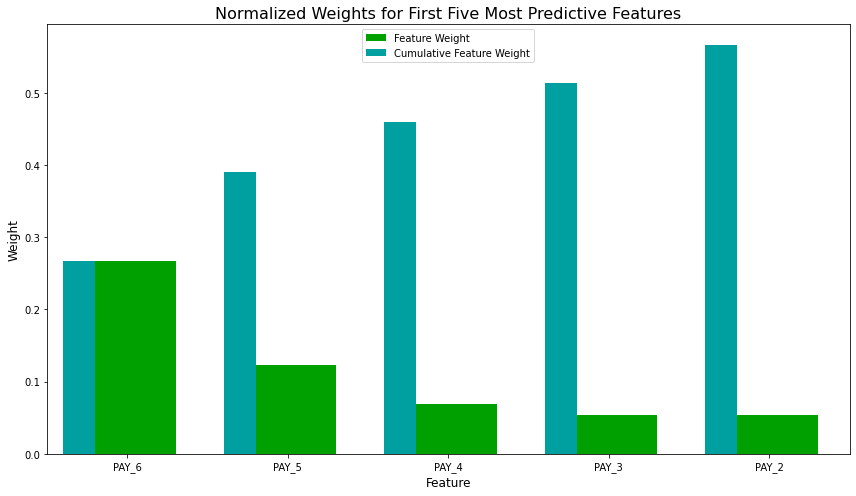

In [37]:
# Extracting the feature importances using .feature_importances_ 
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [38]:
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:5]]
columns

array(['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2'], dtype=object)

#### Extracted Features Vs observed 

The `RandomForestModel` agreed with our observation about importance of `Marital Status` as well as `education number` and `relationship` features. Furthermore, the model estimated which specific category of each of those features is the most important. For example, model assessed that Husband category can influence the prediction more than any other categories in relationships. However, the model differ with our observation about `occupation` and `education level`. Instead, it priortize the `capital gain` as well as `age` columns.

<a id = 'f_sel'></a>
### Feature Selection

How does a model perform on a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints to *reduce the feature space* and simplify the information required for the model to learn. 

The code cell below use the same optimized model found earlier, and train it on the same training set *with only the top five important features*. 

In [39]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = Beta_All )))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = Beta_All )))

Final Model trained on full data
------
Accuracy on testing data: 0.8266
F-score on testing data: 0.4785

Final Model trained on reduced data
------
Accuracy on testing data: 0.8271
F-score on testing data: 0.4876


<a id = 'f_eff'></a>
### Effects of Feature Selection

As expected, the feature selection worsen the performance a little bit but since we used more than half of the available information, we can see that final model do pretty well job on the reduced data. However, considering the tiny amount of time needed to train `RandomForestClassifiers`, we actually don't need this compromise. It can be useful if we selected `Support Vector Classifiers` because of their heavy training time. 

<a id ="Conc"></a>
## Conclusion and future work

A strong way to enhance your data science as well as machine learning skills is to participate in Kaggle competitions where you can practice the end-to-end process and see where you are stand in the leaderboard. This can be a strong motivation to keep improving your skills in order to compete effectively. In this notebook, we experienced the complexity of machine learning pipeline by applying several techniques on a real-world dataset. At the end of the day, we achieved a score of `76%` on the test data associated with this competition . A lot of work still needed on the pre-processing stage in order to enhance our score. 